# Project: Investigate and Analyze movies from a movies' database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, I'll be analysing the data from a movies' data source of more than ten thousand (10,000) samples. This data contains different informations about different movies, describing the movies and showing different informations about them, including their years of release and date, genre, revenues and budgets, as well as informations like producers, cast, and popularity. 

>> I'll be taking a look at different factors that affect the popularity of movies and also know if revenue is related to how much popularity a movie has. 
> I would also like to know what role genre plays in movies (if any).
> I'll be asking the following questions:

>> Is there a relationship between budget and revenue?

>> Is there a relationship between revenue and vote_average?

>> How has the budget (and/or revenue) changed over the years?

>> What are the properties we can relate to movies with high revenues?


In [1]:
####Importing libraries I would be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> On loading the data table from it's source, I discovered that some columns have non-fitting data-types. In this section, I would be coverting these columns to appropriate data-types, which I'll be working with.


> 
### General Properties
> I'll be working with about only 10 of the columns, and won't be using the entire data-table.

>> Columns I'll be using include 'revenue' which shows the profit and proceeds made from the movie, 'budget' which is the amount invested in the production of the movie. I'll also be using the 'vote_count' and 'vote_average' columns, which shows how well the ratings of each movie is, while 'release_date' and 'release_year' indicate the date of the release of the movie, and year respectively . Another important column is 'genres' showing the type of movie in terms of it's content and story-line, the category to which the movie belongs.

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.shape

(10866, 21)

In [5]:
### creating a copy of data-table and naming it 'new_df'
new_df = df.copy()
new_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## 
> Most movies have revenues between 0 and 24million also most ratings are around the value of 6

In [6]:
### the 'release_date' column has a data-type of string, I have to convert to type 'datetime'
new_df['release_date'] = pd.to_datetime(new_df['release_date'])


In [7]:
### also convert 'revenue' and 'budget' columns to type float
new_df['revenue'] = new_df['revenue'].astype(float)
new_df['budget'] = new_df['budget'].astype(float)
new_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
### Summary of our new data table

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  float64       
 4   revenue               10866 non-null  float64       
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

### Data Cleaning 
> I found that the 'production_companies' and 'imdb_id'  columns have missing values, so I would be dropping them, since they would not be needed in my analysis. I would like to maintain one id for the table (one id is enough for the analysis; the 'id' column is just enough to serve as a 'key')

> I also dropped columns 'cast', 'homepage', 'tagline', 'director', 'overview', and 'keywords', because I believe I won't be usuing them in my analyses.


In [9]:
# dropping 'production_companies' and 'imdb_id'
new_df.drop(['production_companies', 'imdb_id'], axis='columns', inplace=True)

In [10]:
###dropping columns not needed for my analysis.

new_df.drop(['cast', 'homepage', 'tagline', 'director', 'overview', 'keywords', 'budget_adj', 'revenue_adj' ], axis='columns', inplace=True)
new_df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   budget          10866 non-null  float64       
 3   revenue         10866 non-null  float64       
 4   original_title  10866 non-null  object        
 5   runtime         10866 non-null  int64         
 6   genres          10843 non-null  object        
 7   release_date    10866 non-null  datetime64[ns]
 8   vote_count      10866 non-null  int64         
 9   vote_average    10866 non-null  float64       
 10  release_year    10866 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 933.9+ KB


>From the information of the data table, we see that column 'genre' has some missing values, which are interpreted as null values. I editted these rows.

>I also dropped rows of duplicate values.

>I filled the 'genres' column containing null-values with a new genre 'Generic'. I also discovered that a lot of rows have zero(0) budget and zero(0) revenue values, however, I wasn't sure if these values were an ommission or the actual values of budget and revenue, since most fall within years before 2000, thus, I left them as zero values

In [12]:
###cleaning up my data from coulumns with null values
###fill the null values in 'genres' with the value 'Generic'

new_df['genres'].fillna('Generic', inplace=True)

In [13]:
###Drop duplicate rows

new_df.drop_duplicates(inplace=True)

In [14]:
###check for null values
new_df.isnull().sum().any()

False

In [15]:
###check for duplicate rows
d=new_df.duplicated()
sum(d)

0

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  float64       
 3   revenue         10865 non-null  float64       
 4   original_title  10865 non-null  object        
 5   runtime         10865 non-null  int64         
 6   genres          10865 non-null  object        
 7   release_date    10865 non-null  datetime64[ns]
 8   vote_count      10865 non-null  int64         
 9   vote_average    10865 non-null  float64       
 10  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 1018.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning up my data table 

> I analyzed different factors using the information from the data table, using different grouping and query methods, to establish if there exixts relationships between different columns or not, and if so what nature of relationship, and also, how does one factor affect the other. 

> I used different plottings of bar and scatter to show some of these relations and how they interpret the data
### Research Question 1: Is there a relationship between budget and revenue?

In [17]:
### for convenience reasons, I'll be aliasing some of the columns, and I'll be using these variables onwards to reference these columns

a = new_df['release_year']
b = new_df['revenue']
c = new_df['popularity']
d = new_df['budget']

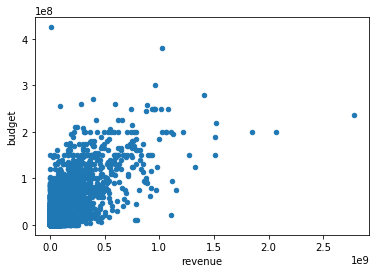

In [18]:
### making a 'simple' scatter-plot to determine if there exists any relationship between budgets and revenue

new_df.plot(x='revenue', y='budget', kind='scatter')


### Research Question 2:  Is there a relationship between revenue and vote_average?

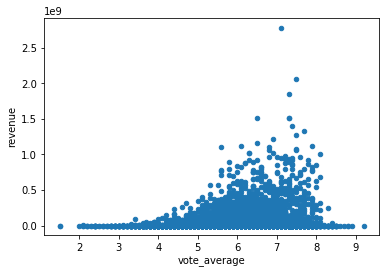

In [19]:
new_df.plot(x='vote_average', y='revenue', kind='scatter')

<BarContainer object of 10865 artists>

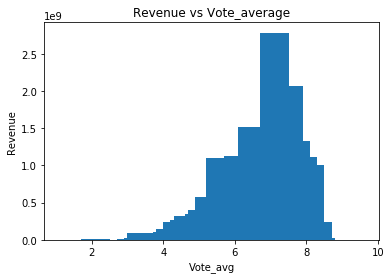

In [63]:
plt.title('Revenue vs Vote_average')
plt.xlabel('Vote_avg')
plt.ylabel('Revenue')
plt.bar(new_df.vote_average, b)

### Research Question 3:  How has the budget (and/or revenue) changed over the years?

<BarContainer object of 10865 artists>

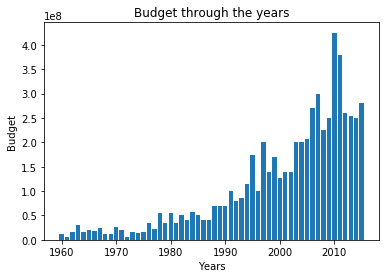

In [64]:
plt.title('Budget through the years')
plt.xlabel('Years')
plt.ylabel('Budget')
plt.bar(a, d)

<BarContainer object of 10865 artists>

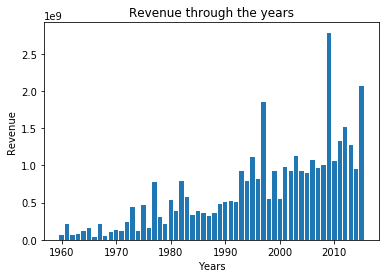

In [65]:
plt.title('Revenue through the years')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.bar(a, b)

### Research Question 4:  Which movies have the highest revenue, best vote_average and highest budget?

In [20]:
rev = new_df['revenue'].max()
rev_max = new_df[new_df['revenue']== rev]
rev_max

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009


In [21]:
bud = new_df['budget'].max()
bud_max = new_df[new_df['budget']== bud]
bud_max

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
2244,46528,0.25054,425000000.0,11087569.0,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010


In [22]:
rank = new_df['vote_average'].max()
vote_av_max = new_df[new_df['vote_average'] == rank]
vote_av_max

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
3894,125336,0.006925,0.0,0.0,The Story of Film: An Odyssey,900,Documentary,2011-09-03,14,9.2,2011


### Research Question 5:  What are the properties we can relate to movies with high revenues?
> To solve this, I grouped the table into simple sections of different ratings from 'zero' to 'very high', representing how well they have generated revenues, ranging from zero(0), through the mean, up to the maximum value.
> I considered different factors that could be related to high_revenue movies

In [23]:
### Setting limits for the different boundaries
f = 0
g = 1
h = 5000000
i = b.quantile(0.75)
j = b.mean()
k = b.max()

### Splitting the data table and then creating a new column to handle this categorization
gf = [f, g, h, i, j, k]
new_df['rev_grade'] = pd.cut(b, gf, labels=['zero', 'low', 'medium', 'high', 'very_high'], include_lowest=True)
new_df.head(10)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,rev_grade
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,very_high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,very_high
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,very_high
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,very_high
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,very_high
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,very_high
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,very_high
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,very_high
8,211672,7.404165,74000000.0,1.156731e+09,Minions,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,very_high
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,very_high


> Can the month of release also afeect the revenue of a film release? How do revenues vary w.r.t month of release?

In [24]:
### getting months from the column 'release_date'
month = new_df.release_date.apply(lambda x: x.month)

In [25]:
### creating a new column and assigning the extracted data to it 
new_df['month'] = month

<BarContainer object of 10865 artists>

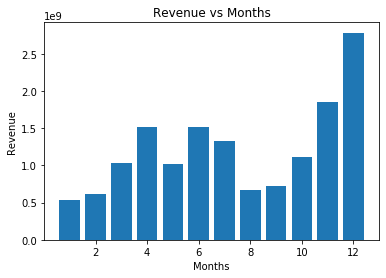

In [72]:
### a plot to see how revenues are distributed by months
plt.title('Revenue vs Months')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.bar(month,b)

In [26]:
### top most expensive films to produce
new_df.sort_values(by='budget', ascending=False).head(10)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,rev_grade,month
2244,46528,0.250540,425000000.0,1.108757e+07,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,medium,12
3375,1865,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,136,Adventure|Action|Fantasy,2011-05-11,3180,6.3,2011,very_high,5
7387,285,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,169,Adventure|Fantasy|Action,2007-05-19,2626,6.8,2007,very_high,5
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,141,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015,very_high,4
6570,1452,1.957331,270000000.0,3.910812e+08,Superman Returns,154,Adventure|Fantasy|Action|Science Fiction,2006-06-28,834,5.3,2006,very_high,6
4411,49529,1.588457,260000000.0,2.841391e+08,John Carter,132,Action|Adventure|Fantasy|Science Fiction,2012-03-07,1479,6.0,2012,very_high,3
1929,38757,2.865684,260000000.0,5.917949e+08,Tangled,100,Animation|Family,2010-11-24,2019,7.3,2010,very_high,11
7394,559,2.520912,258000000.0,8.908716e+08,Spider-Man 3,139,Fantasy|Action|Adventure,2007-05-01,2083,5.8,2007,very_high,5
5508,57201,1.214510,255000000.0,8.928991e+07,The Lone Ranger,149,Action|Adventure|Western,2013-07-03,1607,6.0,2013,very_high,7
4367,49051,4.218933,250000000.0,1.017004e+09,The Hobbit: An Unexpected Journey,169,Adventure|Fantasy|Action,2012-11-26,6417,6.9,2012,very_high,11


In [27]:
new_df[new_df.rev_grade == 'very_high'].sort_values(by='revenue', ascending = False).head(10)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,rev_grade,month
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,very_high,12
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,very_high,12
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,very_high,11
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012,very_high,4
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,very_high,6
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,very_high,4
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,141,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015,very_high,4
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,130,Adventure|Family|Fantasy,2011-07-07,3750,7.7,2011,very_high,7
5422,109445,6.112766,150000000.0,1.274219e+09,Frozen,102,Animation|Adventure|Family,2013-11-27,3369,7.5,2013,very_high,11
5425,68721,4.946136,200000000.0,1.215440e+09,Iron Man 3,130,Action|Adventure|Science Fiction,2013-04-18,6882,6.9,2013,very_high,4


In [28]:
### more than half of the movies generated zero revenue
new_df[b == 0].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,month
count,6016.000000,6016.000000,6.016000e+03,6016.0,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000
mean,83388.397440,0.325041,2.578095e+06,0.0,97.319315,40.975731,5.834774,2001.645944,6.722074
std,102167.918009,0.303061,8.818167e+06,0.0,36.998833,67.208526,1.010550,13.726299,3.501794
min,17.000000,0.000065,0.000000e+00,0.0,0.000000,10.000000,1.500000,1960.000000,1.000000
25%,14347.750000,0.146901,0.000000e+00,0.0,88.000000,13.000000,5.200000,1996.000000,4.000000
50%,30060.500000,0.261640,0.000000e+00,0.0,95.000000,21.000000,5.900000,2007.000000,7.000000
75%,118997.000000,0.419151,0.000000e+00,0.0,105.000000,40.000000,6.500000,2012.000000,10.000000
max,414419.000000,8.411577,1.500000e+08,0.0,900.000000,1143.000000,9.200000,2015.000000,12.000000


In [29]:
### more than half of the movies had zero(0) budget
new_df[d == 0].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,month
count,5696.000000,5696.000000,5696.0,5.696000e+03,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000
mean,84717.470330,0.332499,0.0,3.106567e+06,97.512289,43.842872,5.923016,2001.386060,6.740695
std,103256.100682,0.312857,0.0,1.415789e+07,36.917841,69.771873,0.976305,13.687058,3.473062
min,6.000000,0.000065,0.0,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,1.000000
25%,14338.000000,0.147059,0.0,0.000000e+00,88.000000,13.000000,5.300000,1994.000000,4.000000
50%,30167.500000,0.265198,0.0,0.000000e+00,95.000000,21.000000,6.000000,2007.000000,7.000000
75%,122503.250000,0.428845,0.0,0.000000e+00,106.000000,43.000000,6.600000,2012.000000,10.000000
max,409696.000000,8.411577,0.0,2.536254e+08,900.000000,1329.000000,9.200000,2015.000000,12.000000


In [30]:
### sorting to find if there are movies with zero budgets and yet have high or very high revenues
new_df[d == 0].sort_values(by='revenue', ascending = False)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,rev_grade,month
7470,11199,0.907749,0.0,253625427.0,Wild Hogs,100,Action|Adventure|Comedy,2007-03-02,361,5.6,2007,very_high,3
9467,9396,0.838320,0.0,239606210.0,Crocodile Dundee II,110,Adventure|Comedy,1988-05-19,159,5.5,1988,very_high,5
95,258509,1.841779,0.0,233755553.0,Alvin and the Chipmunks: The Road Chip,92,Adventure|Animation|Comedy|Family,2015-12-17,278,5.7,2015,very_high,12
10009,11092,0.548596,0.0,221303188.0,Presumed Innocent,127,Drama|Thriller|Crime|Mystery,1990-07-26,59,6.3,1990,very_high,7
8099,6950,1.041497,0.0,189859560.0,Outbreak,127,Action|Drama|Science Fiction|Thriller,1995-03-10,249,6.1,1995,very_high,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,73933,0.268708,0.0,0.0,Monster Brawl,89,Comedy|Horror,2011-01-01,11,4.0,2011,zero,1
3728,75720,0.269272,0.0,0.0,One Life,85,Family|Documentary,2011-07-19,17,6.9,2011,zero,7
3727,76420,0.273056,0.0,0.0,DC Showcase: Catwoman,15,Action|Adventure|Animation|Science Fiction,2011-10-18,25,6.4,2011,zero,10
3723,86593,0.279592,0.0,0.0,Wild Bill,98,Drama,2011-10-21,24,6.3,2011,zero,10


In [31]:
# genre of films with high ratings shows a lot are Documentaries
new_df[new_df.vote_average > 8.0 ].head(20)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,rev_grade,month
441,355020,0.220751,0.0,0.000000e+00,Winter on Fire: Ukraine's Fight for Freedom,98,Documentary,2015-10-09,37,8.2,2015,zero,10
538,224972,0.114264,0.0,0.000000e+00,The Mask You Live In,88,Documentary,2015-01-01,11,8.9,2015,zero,1
550,367215,0.106091,0.0,0.000000e+00,The Fear of 13,96,Thriller|Documentary,2015-10-15,19,8.2,2015,zero,10
609,321640,0.033378,0.0,0.000000e+00,The Jinx: The Life and Deaths of Robert Durst,240,Documentary,2015-02-08,72,8.4,2015,zero,2
611,303867,0.032678,0.0,0.000000e+00,World of Tomorrow,17,Animation|Comedy|Science Fiction,2015-03-31,47,8.2,2015,zero,3
650,244786,4.780419,3300000.0,1.399309e+07,Whiplash,105,Drama|Music,2014-10-10,2372,8.2,2014,medium,10
1200,374430,0.129531,0.0,0.000000e+00,Black Mirror: White Christmas,74,Drama|Horror|Mystery|Science Fiction|Thriller,2014-12-16,41,8.8,2014,zero,12
1225,298931,0.097531,0.0,0.000000e+00,Billy Elliot: The Musical,163,Drama|Music|Comedy,2014-09-28,10,8.1,2014,zero,9
1322,283559,0.004853,0.0,0.000000e+00,One Direction: Where We Are - The Concert,106,Documentary|Music,2014-10-08,32,8.3,2014,zero,10
1864,19105,0.103773,0.0,0.000000e+00,Iron Maiden: Flight 666,112,Documentary|Music,2009-04-21,28,8.3,2009,zero,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002126912C948>,
      dtype=object)

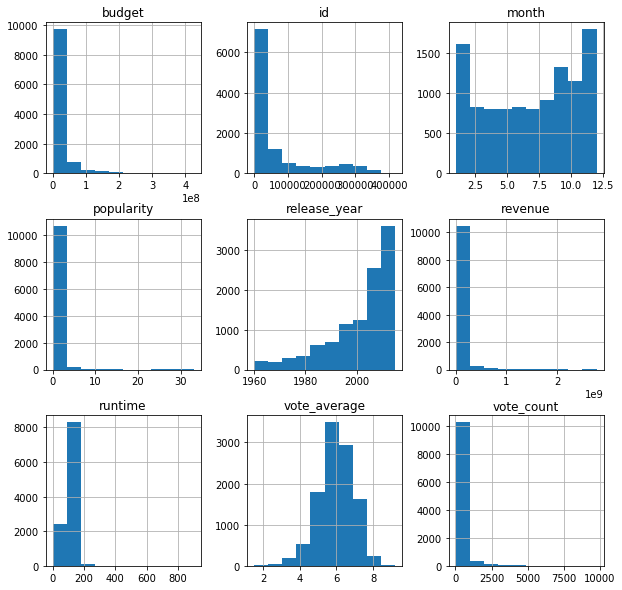

In [32]:
new_df.hist(figsize=(10,10))

In [33]:
new_df.to_csv('new_df_editted3.csv')

In [34]:
new_df.to_excel('new_df_editted3.xls')

<a id='conclusions'></a>
## Conclusions

> Depending on the nature of films produced, they could be either to generate revenue like in "block-bustter movies" or for educational purposes like in documentaries, and based on these targets, we could say a movie is "good" or "not good". Various factors could affect how good a movie or film is, I have taken some of those factors into consideration, and have asked the following questions:


> Is there a relationship between budget and revenue?
>> I could see that both budget and revenue has greatly increased through the years, both making major increase starting from late-90s. However, we cannot absolutely conclude that one is completely (or partially) dependent on the other, we can't also infer that they are directly related, since we see also in other analyses that there are zero-budget movies with very high revenues, as well as high budget movies with low budgets, thus, there could be other factors that might have led to similar growth over the years. 

> Is there a relationship between revenue and vote_average?
>> From the bar chart of "Revenue vs Vote_average", there's a strong corelation between these two, as well as can be seen in the scatter plot. This corelation however, is not through-out the entire range of either of the axis. We can say that on the average, movies with higher vote_average are very likely to have higher revenues. I also found out that there were very few  or no revenues at either end of the vote_average spectra, and on further inspection, found that most films at the higher end of the vote_aveage(8.0 to 9.2) are Documentaries, which might have high budgets, but not high or very revenues, but that is not the case at the other end with low vote_average. We can strongly say that higher vote_average values are directly related to higher revenues.

> How has the budget (and/or revenue) changed over the years?
>> There has been a gradual and not-so-steady rise in both budget and revenue through the years, we can say that as years went by, more and more was invested into the film industry, and thus it generated more revenue. We could also say that as films generated revenues more over the years, more was added to their budget, however, we can't be certain which growth preceeds or initiates the other. The highest revenue generated was in the year 2009, and highest budget was in 2010, once again indicating some form of relationship.

> What are the properties we can relate to movies with high revenues?
>> From the 'rev_grade' categories, we see there's a pattern that shows Action, Adventure,  Sci-Fi, and Fantasy as very-high grossing genres. Other genres close to this include Comedy and Family. I decided not to split the genres and leave them as categorized because, in recent times movies usually do not have one specific genre, and can be classed as a mix just like in the data given. 
>> I also plotted a bar chart of 'revenue' against months of release, to see if a particular month of releasae does better than others, and the 12th month (December) stands better than every other month of release. There could be different reasons affecting this like the holidays, and relatively higher expenditures in the month, but I can't conclude the exact reasons for this high revenue as compared to other months.

> Generally, I believe that though we can't acertain a directly proportional relationship between budget and revenue, it would also be 'wise' to say that to make a good movie and generate good revenue with good rating, a good budget as well is necessary. Timing is also important, thus I would suggest a good month of release, and avoid the months with very low revenues.




## Reference used
> https://stackoverflow.com/questions/35763698/pandas-cut-method-excludes-lower-bound